<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_AirBNB_clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


# **1.a. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Impor Perpustakaan untuk dataset
import numpy as np
import pandas as pd
#Grafik
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#impor dataset
from google.colab import drive
drive.mount('/content/drive')
#impor untuk preproses data
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#proses inisiasi category_encoders
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

In [5]:
#inisiasi 'pelabelan banyak'
from sklearn.preprocessing import MultiLabelBinarizer

Pelabelan banyak berperan sebagai pembagi klasifikasi kamar

In [6]:
#perpustakaan untuk interpolasi
from scipy.interpolate import interp1d

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [7]:
#Impor Data
airbnbdf = pd.read_csv('/content/drive/MyDrive/csv-files/airbnb-clean.csv', sep=';') # skip bad lines
#Penyalinan data
airbnbc = airbnbdf.copy()
#info
#airbnbc.info()

### Resume data
####   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
* 0   id                              48907 non-null  int64  
* 1   name                            48891 non-null  object
* 2   host_id                         48891 non-null  float64
* 3   host_name                       48871 non-null  object
* 4   neighbourhood_group             48891 non-null  object
* 5   neighbourhood                   48891 non-null  object
* 6   latitude                        48891 non-null  object
* 7   longitude                       48891 non-null  object
* 8   room_type                       48891 non-null  object
* 9   price                           48891 non-null  float64
* 10  minimum_nights                  48891 non-null  float64
* 11  number_of_reviews               48889 non-null  float64
* 12  last_review                     38840 non-null  object
* 13  reviews_per_month               38841 non-null  float64
* 14  calculated_host_listings_count  48890 non-null  float64
* 15  availability_365                48886 non-null  float64

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [27]:
#identifikasi kolom
airbnbc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Total data hilang

In [28]:
#Inspeksi data hilang
airbnbc.isna().sum()

,0
id,0
name,16
host_id,0
host_name,36
neighbourhood_group,16
neighbourhood,16
latitude,16
longitude,16
room_type,16
price,0


# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [30]:
#Persiapan untuk pembarsihan (pergantian jenis data)
airbnbc[['id','host_id']] = airbnbc[['id','host_id']].astype('str').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48891 non-null  object        
 5   neighbourhood                   48891 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

In [46]:
#pergantian jenis data untuk tanggal dan interpolasi
airbnbc['last_review'] = pd.to_datetime(airbnbc['last_review']).copy()
airbnbc['price'].interpolate(method='nearest')
airbnbc['price'].interpolate(method='linear')
airbnbc['reviews_per_month'].interpolate(method='nearest')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48907 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48907 non-null  object        
 4   neighbourhood_group             48907 non-null  object        
 5   neighbourhood                   48907 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48907 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

In [32]:
#persiapan untuk pembersihan
airbnbc.drop_duplicates(inplace=True)
airbnbc.info()
#ke pembersihan kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48891 non-null  object        
 5   neighbourhood                   48891 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

In [35]:
#pengisian kolom kosong (Pengisian nilai untuk kolom)
airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].fillna(0).copy()

# Pengubahan nilai kosong
airbnbc.replace([np.inf, -np.inf], 0, inplace=True)

# Konversi ke kolom angka
airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].astype('int64').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48891 non-null  object        
 5   neighbourhood                   48891 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

In [45]:
#Pengisian kolom kosong
airbnbc['name'].fillna('No Name') #kolom nama kamar
airbnbc['host_name'].fillna('Unidentified') #kolom nama pemilik
airbnbc[['neighbourhood_group', 'neighbourhood']] = airbnbc[['neighbourhood_group', 'neighbourhood']].fillna('Unknown')
airbnbc['room_type'].fillna('Unspecified')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48907 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48907 non-null  object        
 4   neighbourhood_group             48907 non-null  object        
 5   neighbourhood                   48907 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48907 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

In [53]:
#pengisian kolom 'tidak terulas'
airbnbc['last_review'].fillna(0) #tidak diulas
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48907 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48907 non-null  object        
 4   neighbourhood_group             48907 non-null  object        
 5   neighbourhood                   48907 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48907 non-null  object        
 9   price                           48907 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

# **5. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [48]:
#Inspeksi pemodelan kamar
def countsplot(category):
  # Create count plot with dynamic title
  plt.figure(figsize = (10, 9))
  sns.countplot(data = airbnbc, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = airbnbc[category].value_counts() #Nilai perhitungan
  category_percentages = airbnbc[category].value_counts(normalize = True) #Persentase

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

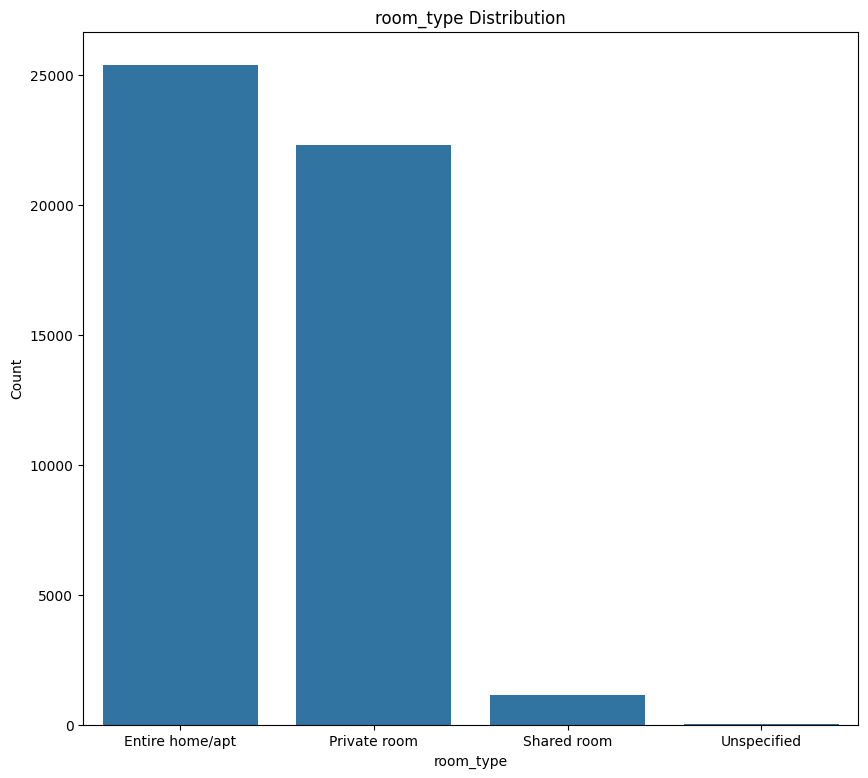

,Count,Proportion
room_type,,
Entire home/apt,"25,408",52.0%
Private room,"22,323",45.6%
Shared room,"1,160",2.4%
Unspecified,16,0.0%


In [51]:
#pemeriksaan jenis kamar
countsplot('room_type')

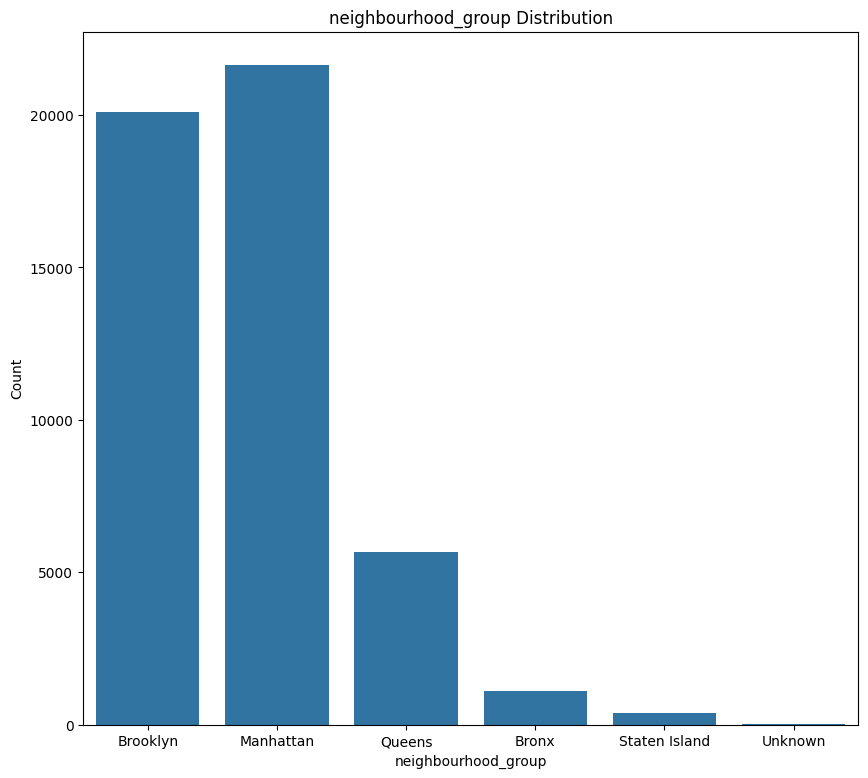

,Count,Proportion
neighbourhood_group,,
Manhattan,"21,659",44.3%
Brooklyn,"20,103",41.1%
Queens,"5,666",11.6%
Bronx,"1,090",2.2%
Staten Island,373,0.8%
Unknown,16,0.0%


In [50]:
#visualisasi hasil (lokasi)
countsplot('neighbourhood_group')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Pemilihan data
cluscol = airbnbc[['']]


In [ ]:
#Persiapan untuk jenis data


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.